In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import Data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Spring 2024/Capstone/Data/FoodAccessAtlas.csv')
df.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.00,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.00,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.68,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


In [ ]:
#dropping all states except new york
df = df.drop(df[df['State'] != 'New York'].index)

In [ ]:
df['County'].unique()

array(['Albany County', 'Allegany County', 'Bronx County',
       'Broome County', 'Cattaraugus County', 'Cayuga County',
       'Chautauqua County', 'Chemung County', 'Chenango County',
       'Clinton County', 'Columbia County', 'Cortland County',
       'Delaware County', 'Dutchess County', 'Erie County',
       'Essex County', 'Franklin County', 'Fulton County',
       'Genesee County', 'Greene County', 'Hamilton County',
       'Herkimer County', 'Jefferson County', 'Kings County',
       'Lewis County', 'Livingston County', 'Madison County',
       'Monroe County', 'Montgomery County', 'Nassau County',
       'New York County', 'Niagara County', 'Oneida County',
       'Onondaga County', 'Ontario County', 'Orange County',
       'Orleans County', 'Oswego County', 'Otsego County',
       'Putnam County', 'Queens County', 'Rensselaer County',
       'Richmond County', 'Rockland County', 'St. Lawrence County',
       'Saratoga County', 'Schenectady County', 'Schoharie County',
     

In [ ]:
nyc_counties = ['Kings County', 'New York County', 'Bronx County', 'Queens County', 'Richmond County']
nyc_df = df[df['County'].isin(nyc_counties)]

In [ ]:
nyc_county_mapping = {'Kings County': 'Brooklyn', 'New York County': 'Manhattan', 'Bronx County': 'Bronx', 'Queens County': 'Queens', 'Richmond County': 'Staten Island'}
nyc_df['County'] = nyc_df['County'].replace(nyc_county_mapping)
nyc_df.head()

<ipython-input-15-c7a27ab98fe3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_df['County'] = nyc_df['County'].replace(nyc_county_mapping)


,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
42957,36005000100,New York,Bronx,1,11091,0,1,11091.0,100.00,0,...,54.0,1724.0,6515.0,180.0,28.0,117.0,2527.0,3779.0,0.0,0.0
42958,36005000200,New York,Bronx,1,4334,1351,0,5.0,0.12,0,...,459.0,1332.0,1264.0,140.0,15.0,52.0,1531.0,2993.0,269.0,275.0
42959,36005000400,New York,Bronx,1,5503,1786,0,12.0,0.22,0,...,421.0,1497.0,1735.0,124.0,6.0,48.0,2093.0,3755.0,432.0,265.0
42960,36005001600,New York,Bronx,1,5643,1925,0,242.0,4.29,0,...,812.0,1556.0,2293.0,63.0,0.0,54.0,1677.0,3482.0,998.0,649.0
42961,36005001900,New York,Bronx,1,1917,550,0,500.0,26.08,0,...,93.0,591.0,641.0,25.0,1.0,22.0,637.0,1186.0,598.0,261.0


In [ ]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 42957 to 46778
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(126), int64(19), object(2)
memory usage: 2.4+ MB


In [ ]:
gender_df = pd.read_csv('/content/gdrive/MyDrive/Spring 2024/Capstone/Data/gender_data.csv')
gender_df.head()

,Borough,AgeGroup,Male,Female,GenderRatio
0,Manhattan,Under 5 years,37830.0,36161.0,1.05
1,Manhattan,5 to 9 years,31390.0,29666.0,1.06
2,Manhattan,10 to 14 years,32515.0,32601.0,1.00
3,Manhattan,15 to 19 years,32832.0,37072.0,0.89
4,Manhattan,20 to 24 years,48731.0,59439.0,0.82


In [ ]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Borough      90 non-null     object 
 1   AgeGroup     90 non-null     object 
 2   Male         90 non-null     float64
 3   Female       90 non-null     float64
 4   GenderRatio  90 non-null     float64
dtypes: float64(3), object(2)
memory usage: 3.6+ KB


In [ ]:
#selecting only Brooklyn
bk_df = df[df['County'] == 'Kings County']
bk_df.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
43956,36047000100,New York,Kings County,1,4338,2227,0,424.0,9.77,0,...,843.0,3396.0,427.0,330.0,0.0,15.0,170.0,347.0,1417.0,126.0
43957,36047000200,New York,Kings County,1,1470,360,0,39.0,2.65,0,...,70.0,530.0,103.0,49.0,0.0,16.0,772.0,1277.0,265.0,138.0
43958,36047000301,New York,Kings County,1,4259,2020,0,488.0,11.46,0,...,688.0,3658.0,180.0,241.0,0.0,6.0,174.0,246.0,1220.0,24.0
43959,36047000501,New York,Kings County,1,4247,1879,0,1082.0,25.48,0,...,553.0,3266.0,292.0,432.0,1.0,22.0,234.0,312.0,1261.0,162.0
43960,36047000502,New York,Kings County,1,2512,1509,0,41.0,1.63,0,...,357.0,2086.0,113.0,186.0,0.0,4.0,123.0,162.0,1165.0,31.0


In [ ]:
bk_df.shape

(754, 147)

# EDA

### food desert rate per borough

In [ ]:
food_desert_yes = nyc_df['County'].loc[nyc_df['LILATracts_halfAnd10'] == 1].value_counts().to_frame()
food_desert_no = nyc_df['County'].loc[nyc_df['LILATracts_halfAnd10'] == 0].value_counts().to_frame()

In [ ]:
# rename county columns
food_desert_yes.rename({'County':'food_desert_yes'}, inplace=True, axis=1)
food_desert_no.rename({'County':'food_desert_no'}, inplace=True, axis=1)

In [ ]:
# join dataframes
county_df = food_desert_yes.join(food_desert_no, how='outer')
county_df

,food_desert_yes,food_desert_no
Bronx,3.0,333
Brooklyn,5.0,749
Manhattan,NaN,286
Queens,11.0,645
Staten Island,13.0,95


In [ ]:
county_df.replace(np.nan, 0, inplace=True)

In [ ]:
# convert to rate and set to 100th deciles
county_df['Rate'] = round(county_df['food_desert_yes']/county_df['food_desert_no'] * 100, 2)
county_df

,food_desert_yes,food_desert_no,Rate
Bronx,3.0,333,0.90
Brooklyn,5.0,749,0.67
Manhattan,0.0,286,0.00
Queens,11.0,645,1.71
Staten Island,13.0,95,13.68


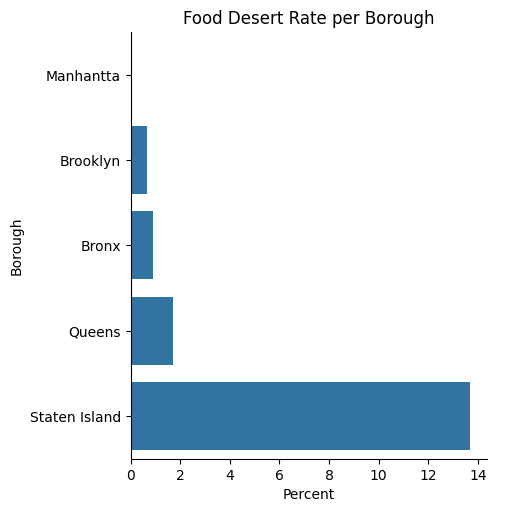

In [ ]:
# visualize food desert rate per borough
sns.catplot(y=county_df.index,
            x='Rate',
            data=county_df,
            kind='bar',
            #orient='h',
            #legend_out=False,
            order=['Manhantta','Brooklyn','Bronx','Queens', 'Staten Island']
            )\
    .set(ylabel='Borough', xlabel='Percent', title='Food Desert Rate per Borough')
plt.show()

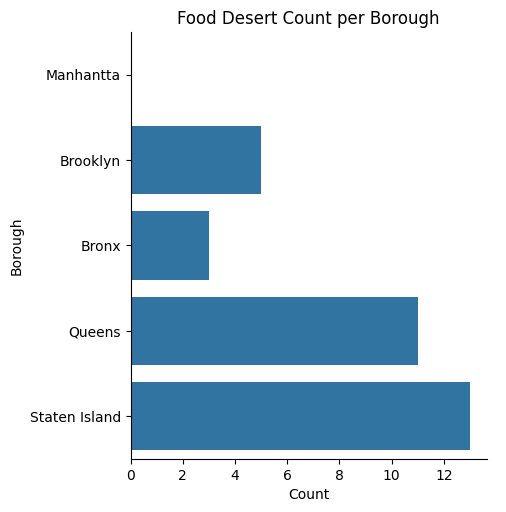

In [ ]:
# visualize food desert count per borough
sns.catplot(y=county_df.index,
            x='food_desert_yes',
            data=county_df,
            kind='bar',
            #orient='h',
            #legend_out=False,
            order=['Manhantta','Brooklyn','Bronx','Queens', 'Staten Island']
            )\
    .set(ylabel='Borough', xlabel='Count', title='Food Desert Count per Borough')
plt.show()

### Gender

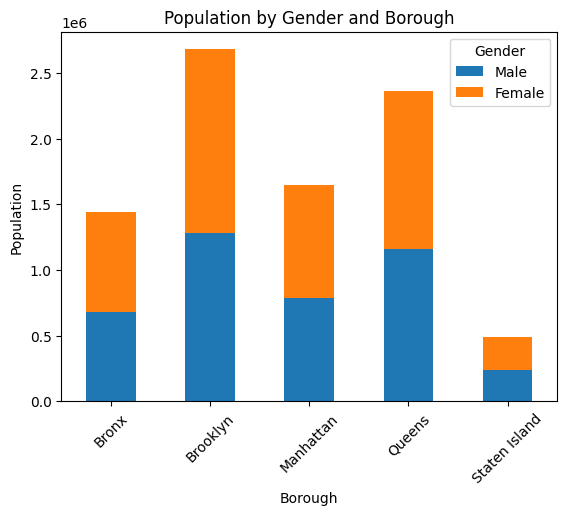

In [ ]:
# Group the data by borough and sum the male and female populations
borough_gender_counts = gender_df.groupby('Borough')[['Male', 'Female']].sum()

# Plot the data
borough_gender_counts.plot(kind='bar', stacked=True)
plt.xlabel('Borough')
plt.ylabel('Population')
plt.title('Population by Gender and Borough')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

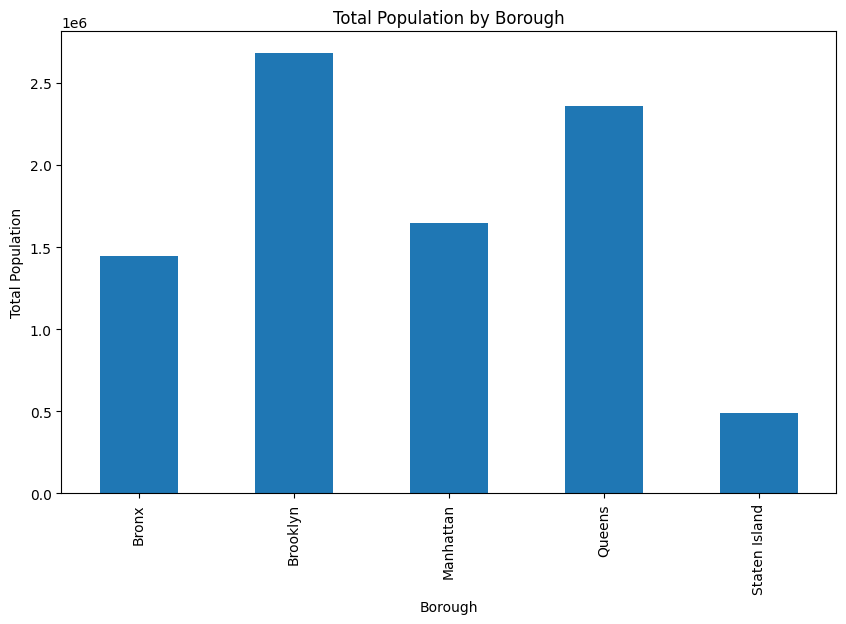

In [ ]:
# Group by borough and sum the male and female populations
total_population = gender_df.groupby('Borough')[['Male', 'Female']].sum()

# Calculate the total population by summing male and female populations
total_population['Total'] = total_population['Male'] + total_population['Female']

# Create a bar chart
plt.figure(figsize=(10, 6))
total_population['Total'].plot(kind='bar')

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Total Population')
plt.title('Total Population by Borough')

# Show the plot
plt.show()


# Import Data : https://data.cityofnewyork.us/Social-Services/Community-Food-Connection-CFC-/mpqk-skis/about_data Quarterly report showing the number of individuals and meals in food pantries and soup kitchens.

In [ ]:
df_food = pd.read_csv('/content/gdrive/MyDrive/Spring 2024/Capstone/Data/Community_Food_Connection.csv')
df_food.head()

,Facility,Report Start Date,Report End Date,Number
0,Food Pantries (Individuals Served),10/1/11,12/31/11,2587785.0
1,Soup Kitchens ( meals served),10/1/11,12/31/11,811222.0
2,Food Pantries (Individuals Served),1/1/12,3/31/12,NaN
3,Soup Kitchens ( meals served),1/1/12,3/31/12,NaN
4,Food Pantries (Individuals Served),4/1/12,6/30/12,NaN


In [ ]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Facility           100 non-null    object 
 1   Report Start Date  100 non-null    object 
 2   Report End Date    100 non-null    object 
 3   Number             92 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [ ]:
df_food['Report Start Date'] = pd.to_datetime(df_food['Report Start Date'])
df_food['Report End Date'] = pd.to_datetime(df_food['Report End Date'])

<ipython-input-3-b7296c4b9105>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_food['Report Start Date'] = pd.to_datetime(df_food['Report Start Date'])
<ipython-input-3-b7296c4b9105>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_food['Report End Date'] = pd.to_datetime(df_food['Report End Date'])


In [ ]:
df_food.head()

,Facility,Report Start Date,Report End Date,Number
0,Food Pantries (Individuals Served),2011-10-01,2011-12-31,2587785.0
1,Soup Kitchens ( meals served),2011-10-01,2011-12-31,811222.0
2,Food Pantries (Individuals Served),2012-01-01,2012-03-31,NaN
3,Soup Kitchens ( meals served),2012-01-01,2012-03-31,NaN
4,Food Pantries (Individuals Served),2012-04-01,2012-06-30,NaN


In [ ]:
df_food = df_food[(df_food['Report Start Date'].dt.year >= 2020) & (df_food['Report End Date'].dt.year >= 2020)]

In [ ]:
df_food.head()

,Facility,Report Start Date,Report End Date,Number
66,Food Pantries (Individuals Served),2020-01-01,2020-03-31,3392824.0
67,Soup Kitchens ( meals served),2020-01-01,2020-03-31,658861.0
68,Food Pantries (Individuals Served),2020-04-01,2020-06-30,6569071.0
69,Soup Kitchens ( meals served),2020-04-01,2020-06-30,938786.0
70,Food Pantries (Individuals Served),2020-07-01,2020-09-30,6543396.0


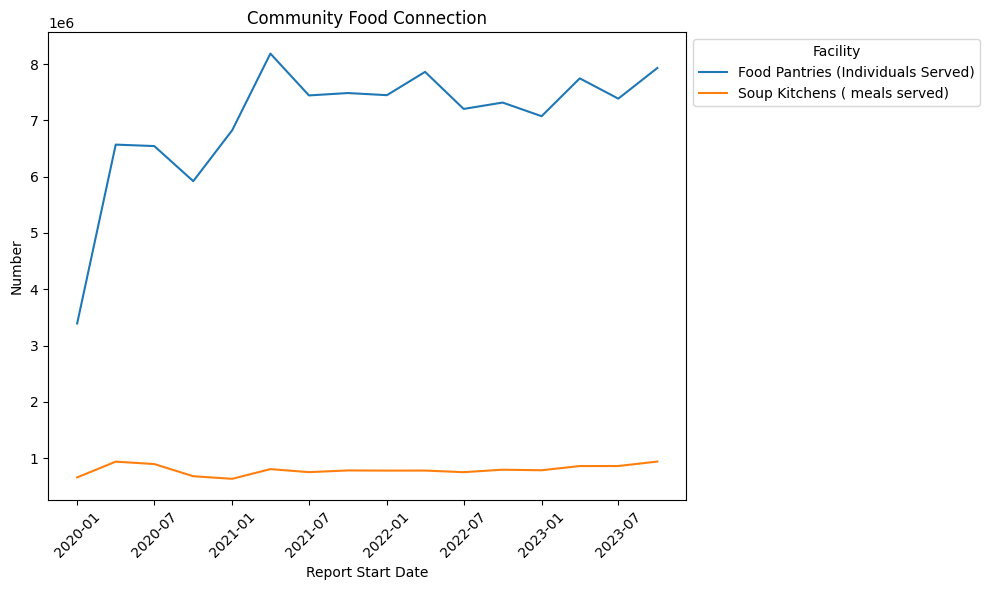

In [ ]:
# Plot the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_food, x='Report Start Date', y='Number', hue='Facility')
plt.title('Community Food Connection')
plt.xlabel('Report Start Date')
plt.ylabel('Number')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Facility', loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot
plt.tight_layout()
plt.show()

# Import Data

In [ ]:
df_gender = pd.read_csv('/content/gdrive/MyDrive/Spring 2024/Capstone/Data/gender_data.csv')
df_gender.head()

,Borough,AgeGroup,Male,Female,GenderRatio
0,Manhattan,Under 5 years,37830.0,36161.0,1.05
1,Manhattan,5 to 9 years,31390.0,29666.0,1.06
2,Manhattan,10 to 14 years,32515.0,32601.0,1.00
3,Manhattan,15 to 19 years,32832.0,37072.0,0.89
4,Manhattan,20 to 24 years,48731.0,59439.0,0.82


In [ ]:
df_gender['Borough'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [ ]:
df_blocks = pd.read_csv('/content/gdrive/MyDrive/Spring 2024/Capstone/Data/census_block_loc.csv')
df_blocks.head()

,Latitude,Longitude,BlockCode,County,State
0,40.48,-74.280000,340230076002012,Middlesex,NJ
1,40.48,-74.276834,340230076005000,Middlesex,NJ
2,40.48,-74.273668,340230076003018,Middlesex,NJ
3,40.48,-74.270503,340230076003004,Middlesex,NJ
4,40.48,-74.267337,340230074021000,Middlesex,NJ


In [ ]:
df_blocks.rename(columns={'County': 'Borough'}, inplace=True)

In [ ]:
df_blocks.head()

,Latitude,Longitude,BlockCode,Borough,State
0,40.48,-74.280000,340230076002012,Middlesex,NJ
1,40.48,-74.276834,340230076005000,Middlesex,NJ
2,40.48,-74.273668,340230076003018,Middlesex,NJ
3,40.48,-74.270503,340230076003004,Middlesex,NJ
4,40.48,-74.267337,340230074021000,Middlesex,NJ


In [ ]:
df_blocks['Borough'].unique()

array(['Middlesex', 'Richmond', 'Monmouth', 'Queens', 'Nassau', 'Kings',
       'Union', 'Hudson', 'Essex', 'New York', 'Bergen', 'Bronx',
       'Passaic', 'Westchester', 'Morris'], dtype=object)

In [ ]:
df_blocks['Borough'].replace({'Richmond': 'Staten Island', 'Kings': 'Brooklyn', 'New York': 'Manhattan'}, inplace=True)

In [ ]:
df_merge = df_blocks.merge(df_gender, on=['Borough'], how='inner')

In [ ]:
df_merge

,Latitude,Longitude,BlockCode,Borough,State,AgeGroup,Male,Female,GenderRatio
0,40.480000,-74.232513,360859901000011,Staten Island,NY,Under 5 years,14063.0,13054.0,1.08
1,40.480000,-74.232513,360859901000011,Staten Island,NY,5 to 9 years,14622.0,13887.0,1.05
2,40.480000,-74.232513,360859901000011,Staten Island,NY,10 to 14 years,16356.0,15373.0,1.06
3,40.480000,-74.232513,360859901000011,Staten Island,NY,15 to 19 years,15822.0,14980.0,1.06
4,40.480000,-74.232513,360859901000011,Staten Island,NY,20 to 24 years,15443.0,14686.0,1.05
...,...,...,...,...,...,...,...,...,...
324949,40.916432,-73.915930,360050319000001,Bronx,NY,65 to 69 years,27496.0,34477.0,0.80
324950,40.916432,-73.915930,360050319000001,Bronx,NY,70 to 74 years,19525.0,27574.0,0.71
324951,40.916432,-73.915930,360050319000001,Bronx,NY,75 to 79 years,12753.0,21663.0,0.59
324952,40.916432,-73.915930,360050319000001,Bronx,NY,80 to 84 years,9060.0,15721.0,0.58


In [ ]:
def convert_to_2d(lats,lons,values):
    latmin = 40.48
    lonmin = -74.28
    latmax = 40.93
    lonmax = -73.65
    lon_vals = np.mgrid[lonmin:lonmax:200j]
    lat_vals = np.mgrid[latmin:latmax:200j]
    map_values = np.zeros([200,200])
    dlat = lat_vals[1] - lat_vals[0]
    dlon = lon_vals[1] - lon_vals[0]
    for lat,lon,value in zip(lats,lons,values):
        lat_idx = int(np.rint((lat - latmin) / dlat))
        lon_idx = int(np.rint((lon-lonmin) / dlon ))
        if not np.isnan(value):
            map_values[lon_idx,lat_idx] = value
    return lat_vals,lon_vals,map_values


In [ ]:
def make_plot(data_values,title='',colors='Greens'):
    lat_vals,lon_vals,values = convert_to_2d(df_merge.Latitude,df_merge.Longitude,data_values)
    fig = plt.figure(1,figsize=[10,10])
    limits = np.min(lon_vals),np.max(lon_vals),np.min(lat_vals),np.max(lat_vals)

    im = plt.imshow(values.T,origin='lower',cmap=colors,extent=limits)
    plt.xlabel('Longitude [degrees]')
    plt.ylabel('Latitude [degrees]')
    plt.title(title)
    plt.colorbar(im,fraction=0.035, pad=0.04)

    plt.show()


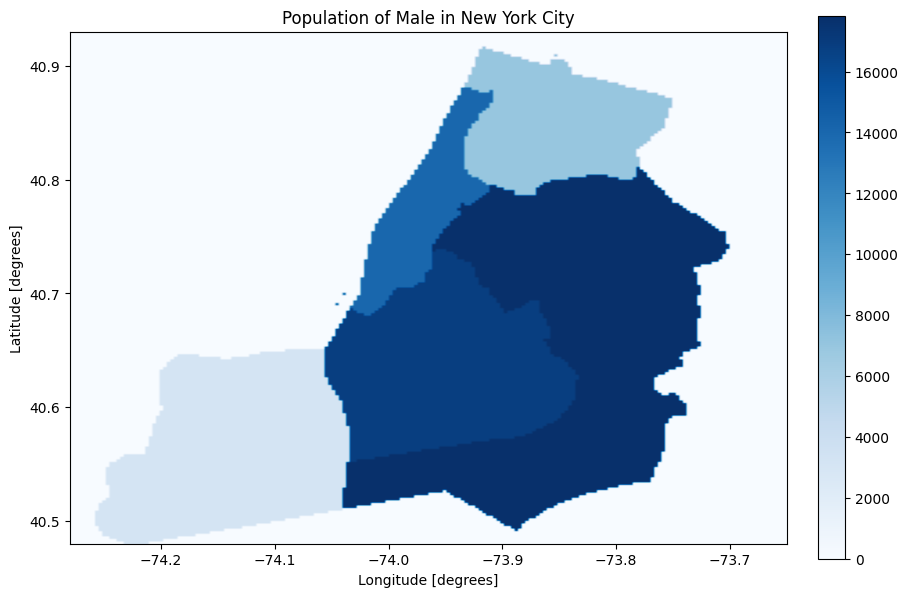

In [ ]:
make_plot(df_merge.Male,colors='Blues',title='Population of Male in New York City')

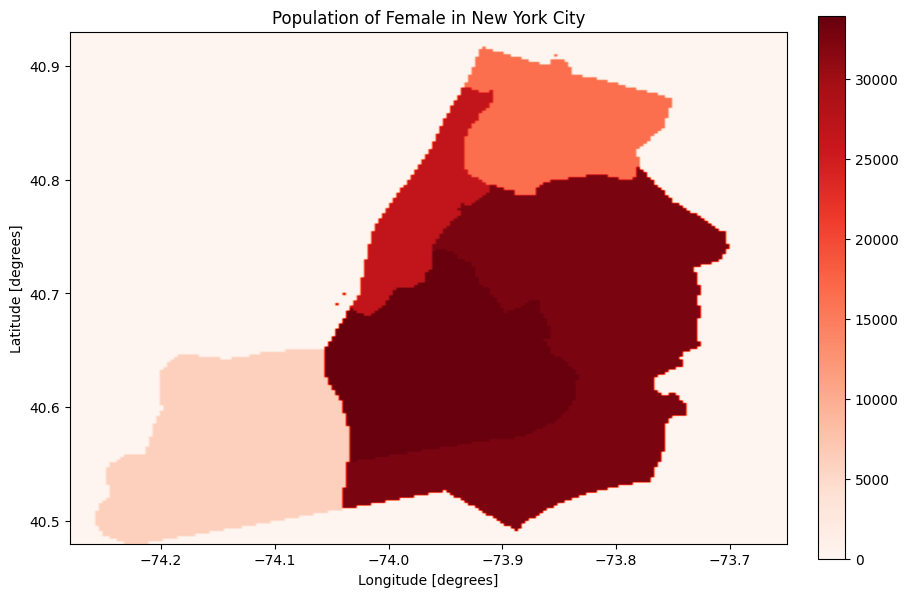

In [ ]:
make_plot(df_merge.Female,colors='Reds',title='Population of Female in New York City')